# FIFA - analiza

## FIFA jest to bardzo bardzo popularna w dzisiejszych czasach gra symulująca grę w piłkę nożną. 

Gra została stworzona przez Studio EA Vancouver w postaci całej serii gier mającej już ponad 20 odsłon, 
które ukazują się każdego roku.Każda wydawana nowa seria jest aktualizowana o nowości technologiczne i 
możliwości przybliżające produkcję do jakbliższej rzeczywistości rozgrywki. Gra ma potężną bazę wiernych
fanów, którzy każdego roku nabywają nowy egzemplarz. 

Grę promoują nawiększe gwiazdy światowego foodball'u tj. Cristiano Ronaldo, Lionel Messi, Neymar Jr. czy Paulo Dybala.
Gra stanowi ciekawą bazę analityczna z tego względu, że studio prowadzi statystki każdego z graczy, którzy w grze występują.
Deweloperzy starają się jak najdokładdniej oddać rzeczywiste statystki prawdziwych piłkarzy przydzielając im odpowiednie dane.
Pozwala to na pewnego rodzaju analizę statystyk, które mają duże odzwierciedlenie w rzeczywistości (np. umiejętności dryblingu,
szybkośc biegu, umiejętności strzeleckie, obbronne czy tężyznę fizczną oraz wiele wiele innych)

Do analizy postanowiłem wykorzystać dostępną w internecie bazę danych wszystkich zawodników ujętych w grze jednak bardziej 
szczegółowo wybrałem zawodników pochodzących z Polski. Przeanalizowane zostały różne, główne dane zawarte w bazie danych.

---

### Początkowa faza zadania obejmuje instalację i import potrzebnych bibliotek.

In [ ]:
import sys
import pandas as pd
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

### Wczytujemy teraz naszą plik z zestawem danych.

In [631]:
df = pd.read_csv('E:/fifa.csv', sep = ',')

### Wyświetlamy tabele do wglądu. 10 rekordów z góry i 10 z dolnej części.

In [632]:
display(df.head(10))

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [633]:
display(df.tail(10))

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18197,18197,246167,D. Holland,18,https://cdn.sofifa.org/players/4/19/246167.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,47,61,Cork City,...,52.0,41.0,47.0,38.0,13.0,6.0,9.0,10.0,15.0,€88K
18198,18198,242844,J. Livesey,18,https://cdn.sofifa.org/players/4/19/242844.png,England,https://cdn.sofifa.org/flags/14.png,47,70,Burton Albion,...,34.0,15.0,11.0,13.0,46.0,52.0,58.0,42.0,48.0,€165K
18199,18199,244677,M. Baldisimo,18,https://cdn.sofifa.org/players/4/19/244677.png,Canada,https://cdn.sofifa.org/flags/70.png,47,69,Vancouver Whitecaps FC,...,40.0,48.0,49.0,49.0,7.0,7.0,9.0,14.0,15.0,€175K
18200,18200,231381,J. Young,18,https://cdn.sofifa.org/players/4/19/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,47,62,Swindon Town,...,50.0,15.0,17.0,14.0,11.0,15.0,12.0,12.0,11.0,€143K
18201,18201,243413,D. Walsh,18,https://cdn.sofifa.org/players/4/19/243413.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,47,68,Waterford FC,...,43.0,44.0,47.0,53.0,9.0,10.0,9.0,11.0,13.0,€153K
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [651]:
display(df.columns)


Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

### Spośród wszystkich kolumn wybieramy te nas intersujące.

In [635]:
def country(x):
    return df[df['Nationality'] == x][['Name', 'Overall', 'Age', 'Position', 'Potential', 'Club', 'Value', 'Preferred Foot']]

pl = country('Poland')

In [661]:
pl.fillna(0, inplace = True)

### Zestawienie ocen Polskich zawodników.

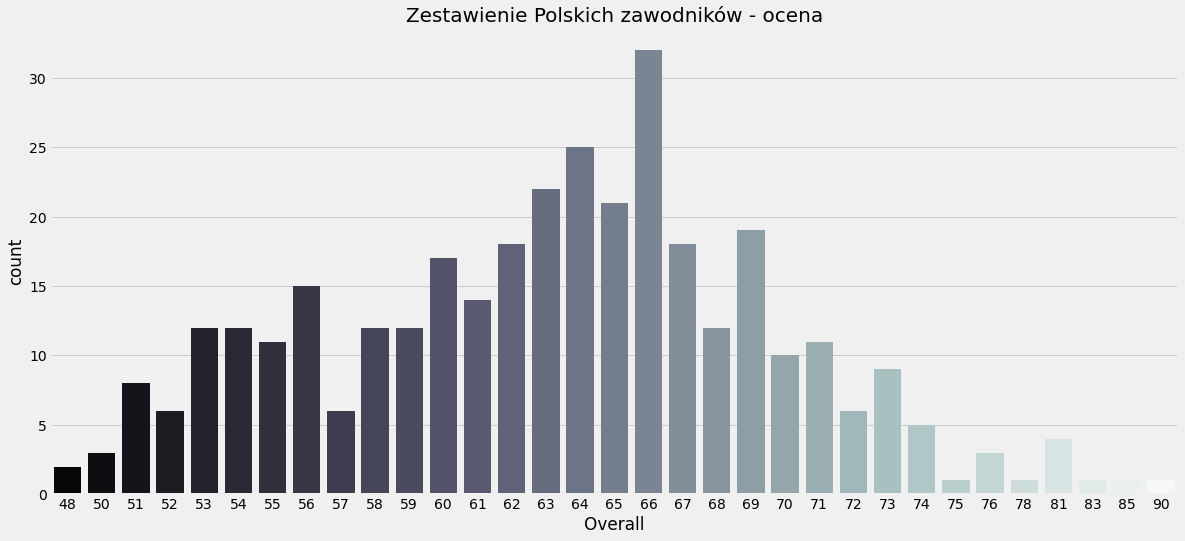

In [652]:

pl.sort_values(by =['Overall'])

plt.rcParams['figure.figsize'] = (18, 8)
sns.countplot(pl['Overall'], palette = 'bone')
plt.title('Zestawienie Polskich zawodników - ocena', fontsize = 20)
plt.show()

Na wykresie wyraźnie widać, ze wartością z największą częstością występowania jest liczba $86$, ogół zawodników osycluje wokół tej wielkości. Im większa wartość tym mniejsza częstośc występowania. Można zatem stwierdzić, że polscy zawodnicy plasują się raczej w średniej półce jeżeli chodzi o jakość przezeń reprezentowaną.

### Zestawie pozycji na jakich występją polscy zawidnicy. 

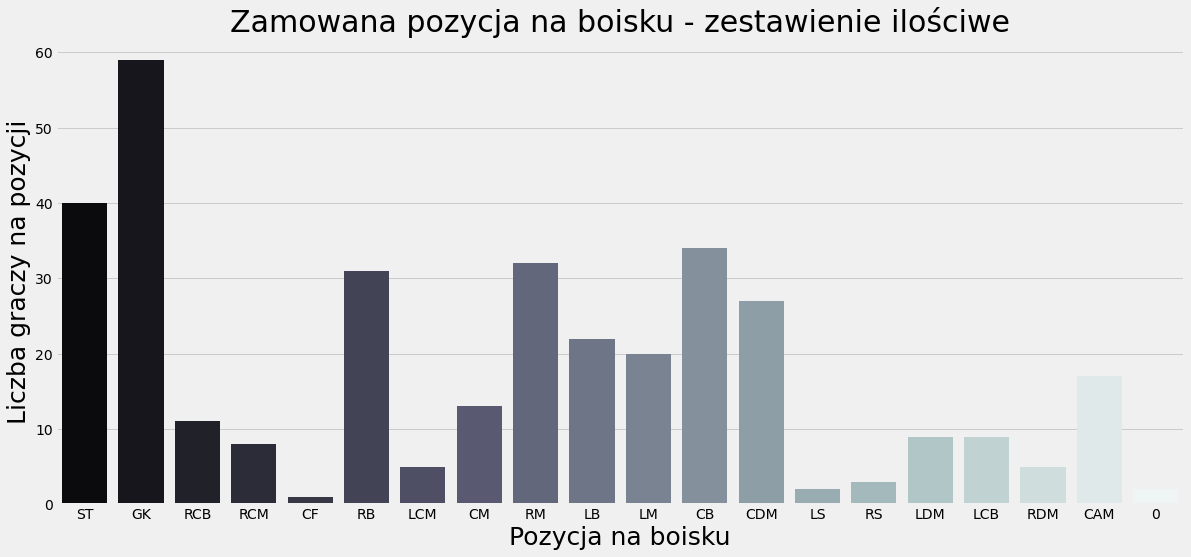

In [653]:
plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = pl, palette = 'bone')
ax.set_xlabel(xlabel = 'Pozycja na boisku', fontsize = 25)
ax.set_ylabel(ylabel = 'Liczba graczy na pozycji', fontsize = 25)
ax.set_title(label = 'Zamowana pozycja na boisku - zestawienie ilościwe', fontsize = 30)
plt.show()

Na powyższym wykresie dostrzec można, że największą pólą polskich piłkarzy są bramkarze. Ma to przełożenie w ogólnym twierdzeniu, że Polska ma dobrych piłkarzy.  

## Silniejsza noga

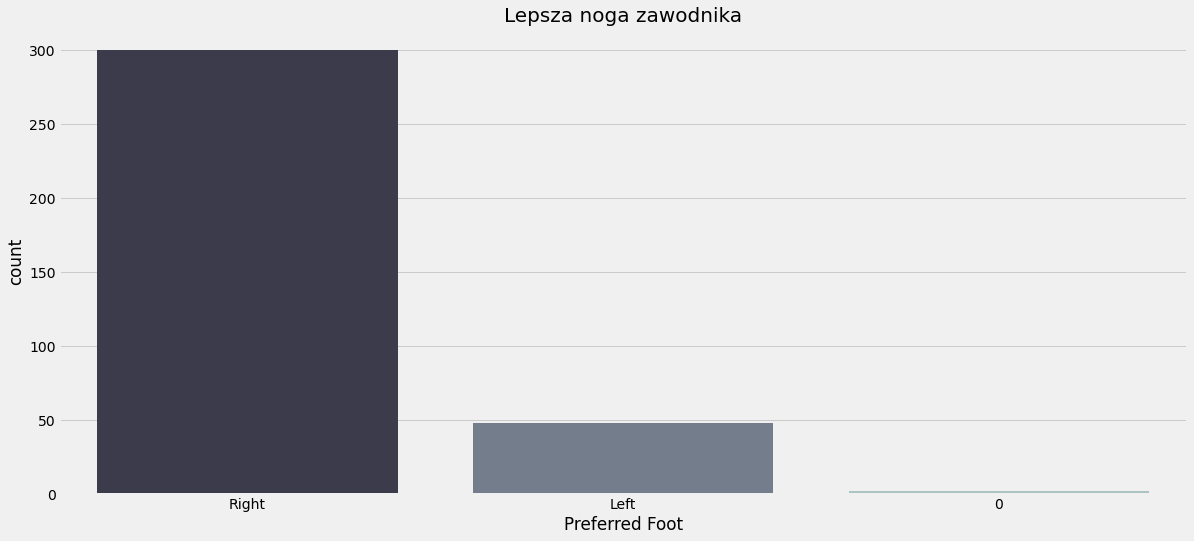

In [655]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.countplot(pl['Preferred Foot'], palette = 'bone')
plt.title('Lepsza noga zawodnika', fontsize = 20)
plt.show()

Wykres informuje nas, że zdecydowana większoć piłkarzy w Polsce jest prawonożna.

## Stosunek wieku do gęstości występwania zawodnika w danym wieku


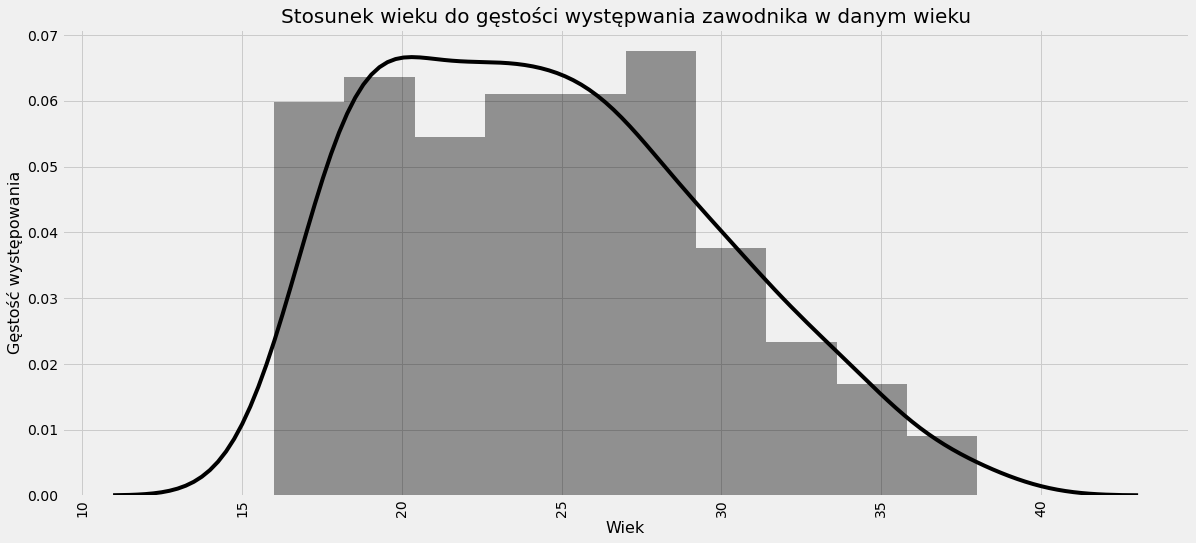

In [640]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)
sns.distplot(pl['Age'], color = 'black')
plt.xlabel('Wiek', fontsize = 16)
plt.ylabel('Gęstość występowania', fontsize = 16)
plt.title('Stosunek wieku do gęstości występwania zawodnika w danym wieku', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Wykres prezentowany powyżej pozawla nam skorelować wiek piłkarzy z gęstościa piłkarza w danym wieku.
Widać, że najwięcej profesjonalnych zawodników jest w przedziale od $15$ do $29$ roku życia, im więk się zwiększa tym liczba zawodników maleje. Wykres taki ma ścisły związek z trybem życia jaki prowadzą sportowcy. Tryb ten jest bardzo intensywny już od wczesnej młodości aż do okolic w zakresie 35-40 lat, gdzie w tym okresie większość zawodników kończy sportową karierę.

## Korelacja wieku z potencjałem zwodnika

In [657]:

pl.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Potential']].head(20).style.background_gradient('magma')




,Name,Age,Club,Potential
2312,A. Boruc,38,Bournemouth,74
5092,M. Wasilewski,38,Wisła Kraków,70
3266,A. Malarz,38,Legia Warszawa,72
11125,J. Szmatuła,37,Piast Gliwice,64
13268,L. Garguła,37,Miedź Legnica,62
7904,L. Załuska,36,Pogoń Szczecin,67
5982,T. Kuszczak,36,Birmingham City,69
12637,W. Łobodziński,35,Miedź Legnica,63
13229,L. Sapela,35,Miedź Legnica,62
9221,P. Brożek,35,Wisła Kraków,66


Powyższa tabela jest miernikiem potencjału zawodników będących juz u schyłku swojej aktywnej sportowej kariery piłkarskiej a jednocześnie mający największy potencjał (na większą ogólną ocene w grze). Widać, że najstarszymi aktywnymi piłkarzami są osoby mające umiejetności powyżej "średniej polskiej".

## Korelacja potencjału zwodnika z jego wiekiem.


In [642]:
pl.sort_values('Potential', ascending = False)[['Name', 'Age', 'Club', 'Potential']].head(20).style.background_gradient('magma')


,Name,Age,Club,Potential
10,R. Lewandowski,29,FC Bayern München,90
340,P. Zieliński,24,Napoli,88
350,A. Milik,24,Napoli,88
92,W. Szczęsny,28,Juventus,87
8514,S. Szymański,19,Legia Warszawa,84
8795,K. Jóźwiak,20,Lech Poznań,84
7388,R. Gumny,20,Lech Poznań,84
3569,S. Żurkowski,20,Górnik Zabrze,83
1505,K. Linetty,23,Sampdoria,83
202,K. Glik,30,AS Monaco,83


Powyższe zestawienie jest porównaniem odwrotnym do wcześniejszego. Tutaj skorelowany został potencjał zawodnika z jego wiekem. 

---

### Zapis zbioru do pliku z rozszerzeniem csv.

In [667]:
pl.to_csv('Output_ST_BK.csv', index = False, header = None)

---

# Podsumowanie

Dane wykorzystane w tym zadaniu nie wymagału dużego nakładu czasu na ich oczyszczanie, z tego względu, że były staranie przygotowane przez studio deweloperskie EA Vancouver. Dane takie są cenne, z kilku powodów: 
* dostarczają szczegółowych informacji na temat stanu i jakości polskiej piłki nożnej i zawodników będących jej częścią.
* pozwalają oceniać możliwości zawodników z dużą szcxegółowością ich możliwości.
* stanowią doskonałą bazę edukacyjną w kwesti analizy danych i ich interpretacji